In [114]:
import pandas as pd             #importa a biblioteca pandas e a nomeia para pd
# import se as sns           #importa a biblioteca seaborn e a nomeia para sns
import matplotlib.pyplot as plt #importa a biblioteca matplotlib e a nomeia para plt
import numpy as np           #importa a biblioteca numpy e a nomeia para np
import seaborn as sns


In [115]:
df = pd.read_csv("dadosacoes.csv") # df é uma variável que pega todos as informações da
# tabela dados_produtos.csv através do pd.read_csv

df.head() # mostra somente as primeiras linhas da variável df

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


2- Exploração dos dados

In [116]:
nomeAcao = np.array(df['nome ação'])
preco = np.array(df['preço ação R$'])
qtdCotas = np.array(df['qtde cotas'])
valorMercado = np.array(df['valor de mercado R$ -(Bilhões)'])



Text(0.5, 0, 'Nome da ação')

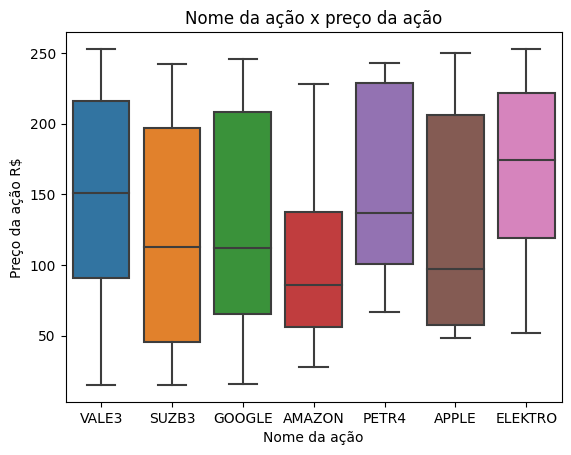

In [117]:
sns.boxplot(x = nomeAcao, y = preco)
plt.title('Nome da ação x preço da ação')
plt.ylabel('Preço da ação R$')
plt.xlabel('Nome da ação')


Text(0.5, 0, 'Nome da ação')

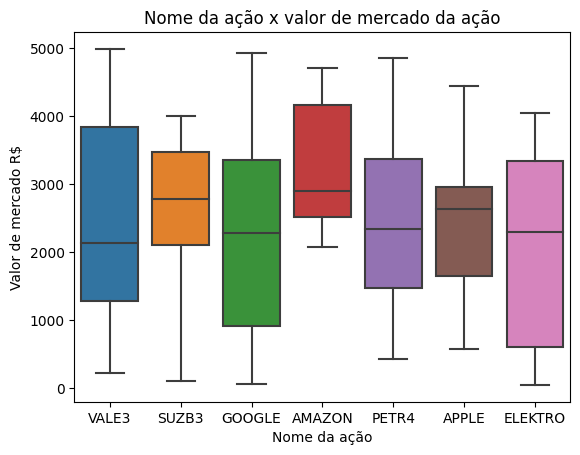

In [118]:
sns.boxplot(x = nomeAcao, y = valorMercado)
plt.title('Nome da ação x valor de mercado da ação')
plt.ylabel('Valor de mercado R$')
plt.xlabel('Nome da ação')

In [119]:
df.info() #exibe informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [120]:
df.describe() # fornece informações puramente descritivas sobre o conjunto de dados

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


3 - pré processamento de dados

In [121]:

from sklearn.cluster import KMeans

4 - Utilizar o Kmeans

In [122]:
df = pd.get_dummies(df,columns=['nome ação'], drop_first=True)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [123]:
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")

SSE: 13009660.390732601


In [124]:
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_


a)

5 - plotar visualização dos clusters formados

SSE: 12976266.566456087


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


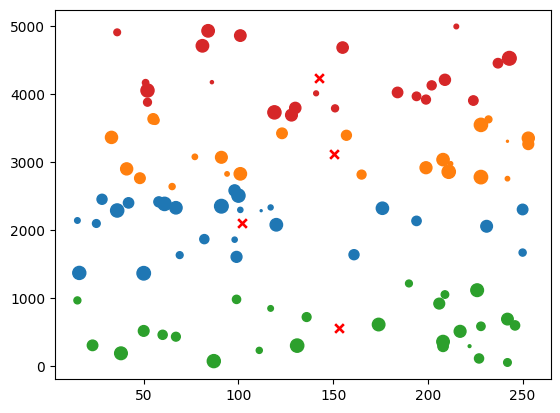

In [125]:
#passo 4 aplicar KMEANS
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_


for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')
    plt.scatter(centroids[:,0],centroids[:,2], marker='x',color='red')

    # fig, ax = plt.subplots(figsize=(10,6))
    # ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')
    

    

plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SSE: 8688485.89487013


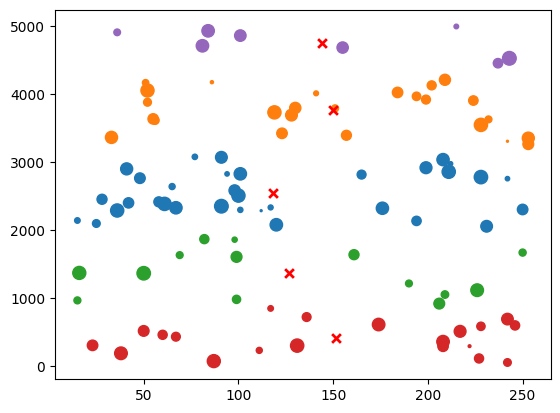

In [126]:
#passo 4 aplicar KMEANS
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_


for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')
    plt.scatter(centroids[:,0],centroids[:,2], marker='x',color='red')

    # fig, ax = plt.subplots(figsize=(10,6))
    # ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')
    

    

plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SSE: 3006877.382408699


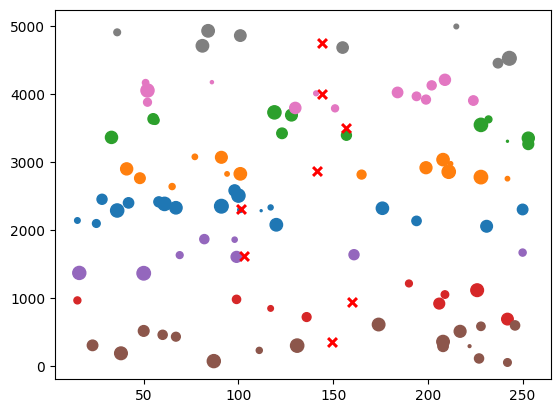

In [127]:
#passo 4 aplicar KMEANS
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_


for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')
    plt.scatter(centroids[:,0],centroids[:,2], marker='x',color='red')

    # fig, ax = plt.subplots(figsize=(10,6))
    # ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')
    

    

plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SSE: 12976674.18386907


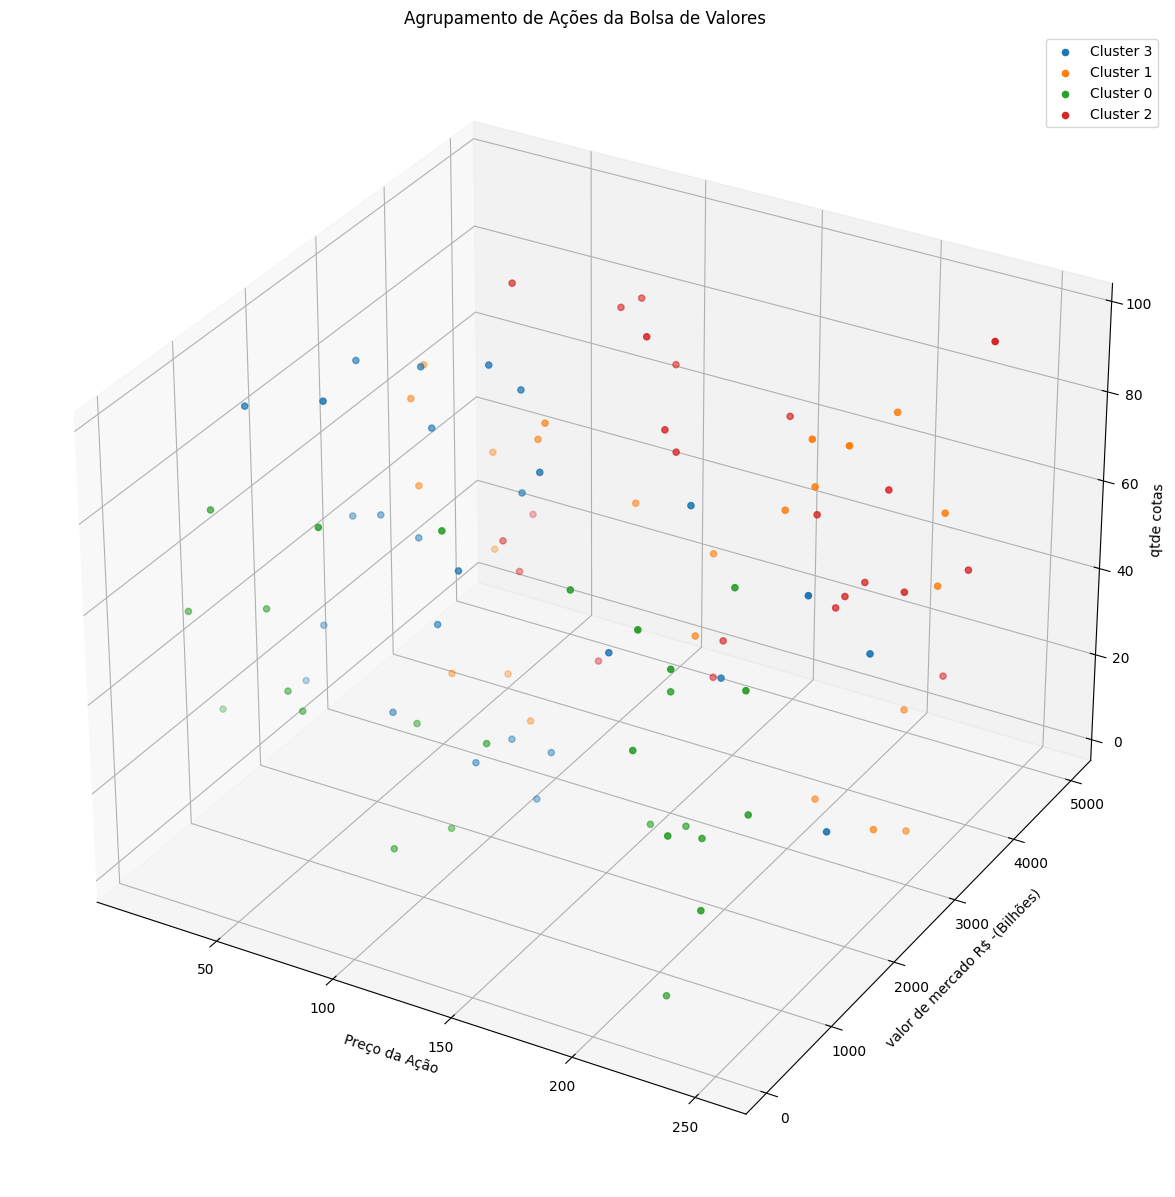

In [128]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')




for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')
    

    # fig, ax = plt.subplots(figsize=(10,6))
    # ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')
    

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('valor de mercado R$ -(Bilhões)')
ax.set_zlabel('qtde cotas')
ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

plt.legend()
plt.show()



c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SSE: 8688440.119978353




Alisson >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cássio mão de alface


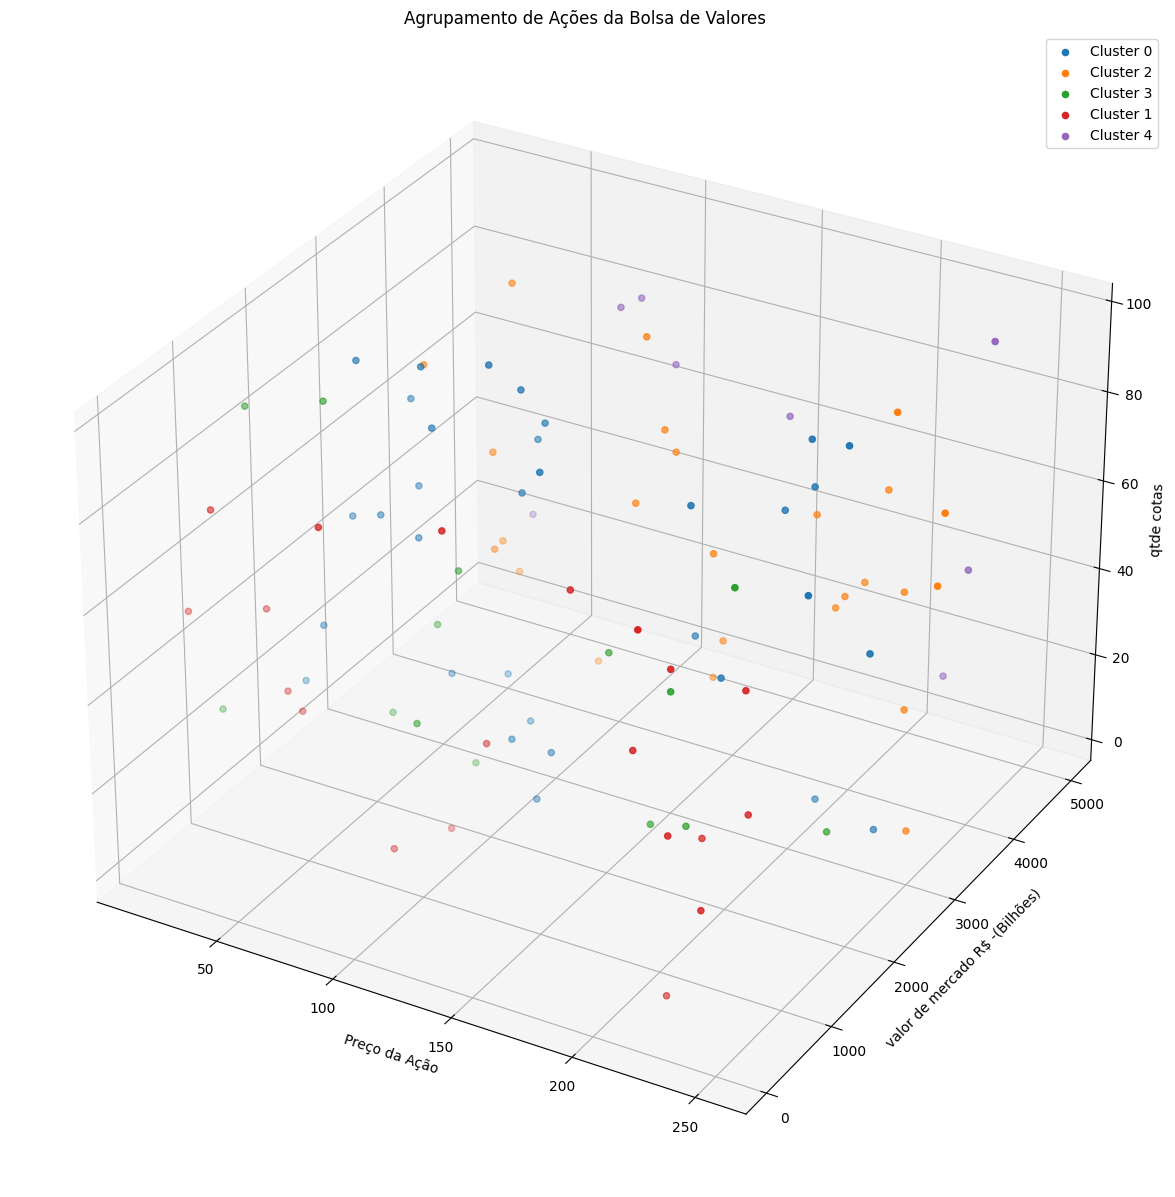

In [132]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
print("\n\n\n\nAlisson >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cássio mão de alface")



for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')
    

    # fig, ax = plt.subplots(figsize=(10,6))
    # ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')
    

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('valor de mercado R$ -(Bilhões)')
ax.set_zlabel('qtde cotas')
ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

plt.legend()
plt.show()

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SSE: 3006867.382408699






Neymar é o melhor do mundo


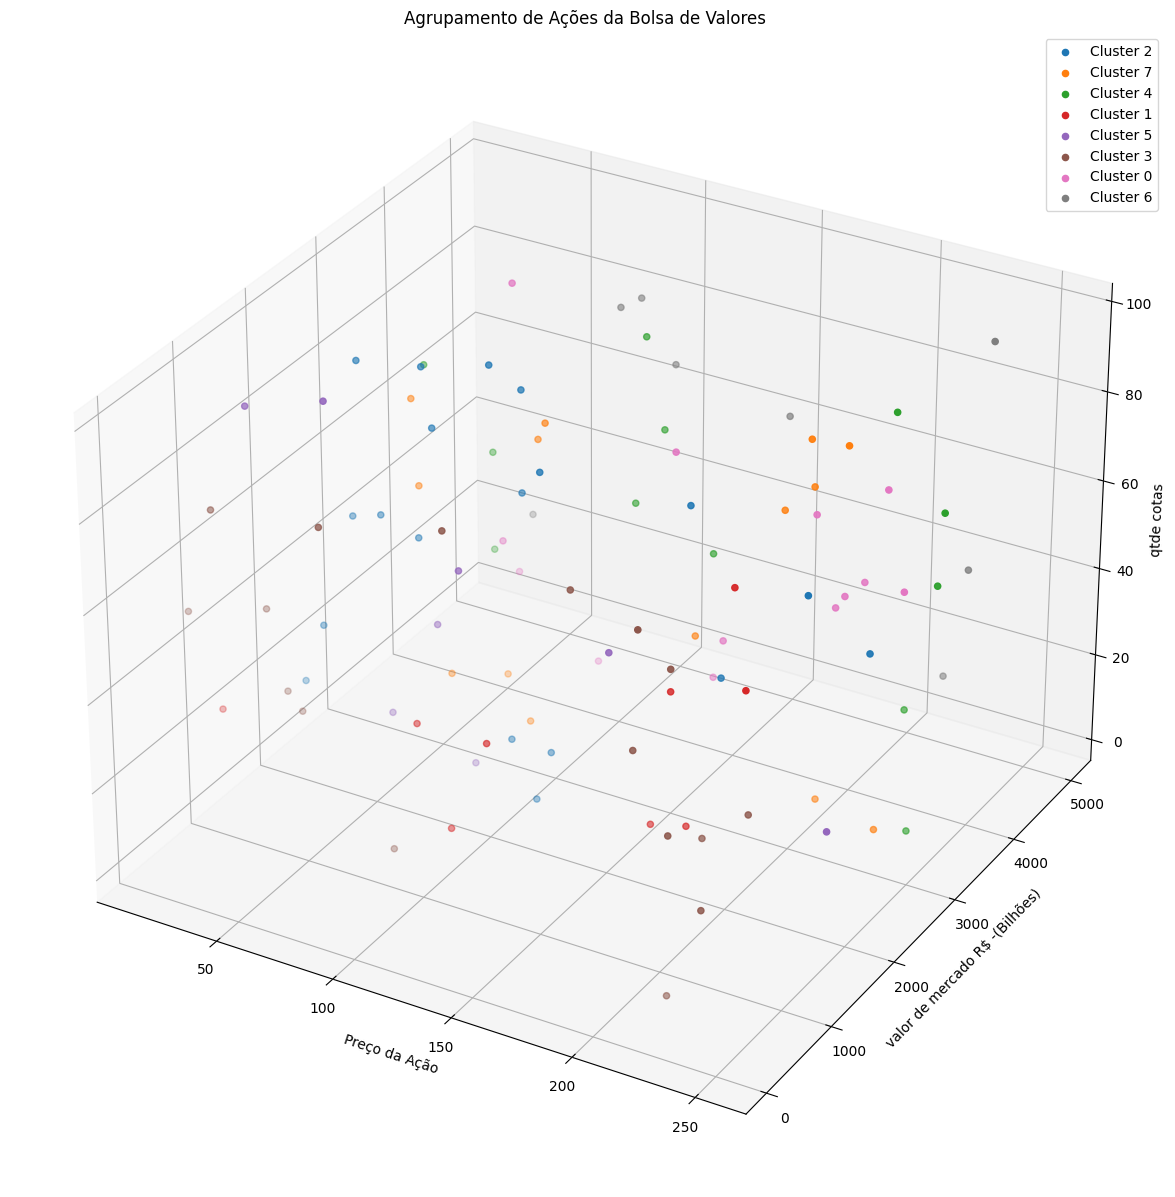

In [133]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
print("\n\n\n\n\n\nNeymar é o melhor do mundo")



for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')
    

    # fig, ax = plt.subplots(figsize=(10,6))
    # ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')
    

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('valor de mercado R$ -(Bilhões)')
ax.set_zlabel('qtde cotas')
ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

plt.legend()
plt.show()

Vantagens do aprendizado não supervisionado


O maior benefício do aprendizado não supervisionado é a capacidade de encontrar padrões e estruturas em conjuntos de dados sem a necessidade de rótulos ou algum "manejamento" do usuário (nós da Data Science). Enquanto no aprendizado supervisionado é necessário fornecer exemplos rotulados para train, no aprendizado não supervisionado, o código explora os dados por conta, identificando padrões, juntando informações semelhantes e descobrindo relações importantes nos dados. Isso torna o aprendizado não supervisionado útil em situações onde os dados não estão nomeados ou quando se busca entender a estrutura  dos dados que não possui orientação ou nomenclatura.